In [3]:
#Initialize classes and libreries
from random_network_models import RandomNetworkModels, StructuralPropertiesRandomNetworks, SpectralPropertiesRandomNetworks
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random as rd
from scipy.linalg import eigh
import seaborn as sns

Here, we show structural properties of an ensemble of random network models. 
--

Values of the parameters for the ER network model:
<br>
Number of nodes $n=$, number of values of $p$, and size of the ensemble.




In [257]:
num_nodes = 50 #Number of nodes for every network model.
num_points = 15
probabilities = np.geomspace(1e-5, 1, num_points)  #Connection probability ER network model.
ensemble_size = 100

In [258]:

#np.zeros((len(probabilities)))
list_average_degree = np.zeros((len(probabilities)))
list_Randic = np.zeros((len(probabilities)))
list_Harmonic = np.zeros((len(probabilities)))
list_number_of_nonisolated_vertices = np.zeros((len(probabilities)))
list_average_local_clustering = np.zeros((len(probabilities)))
list_global_clustering_coefficient = np.zeros((len(probabilities)))



for i in range(ensemble_size):
    pre_average_degree = np.zeros((len(probabilities)))
    pre_Randic = np.zeros((len(probabilities)))
    pre_Harmonic = np.zeros((len(probabilities)))
    pre_number_of_nonisolated_vertices = np.zeros((len(probabilities)))
    pre_average_local_clustering = np.zeros((len(probabilities)))
    pre_global_clustering_coefficient = np.zeros((len(probabilities)))

    for p in probabilities:
        #For the initialization of graphs and their adjacency matrices and 
        # initialize the calculation of structural properties
        ER_Struc = StructuralPropertiesRandomNetworks(num_nodes= num_nodes, model ='ER', p=p)
        
        #Generation of the binary adjacency matrix
        _, binary_adj_matrix = ER_Struc.adjacency_matrix_er()
        
        #Calculation of the average degree
        degrees = ER_Struc.degrees_of_the_network(binary_adj_matrix)
        average_degree = ER_Struc.average_degree(degrees)
        
        #Calculation of Randic and Harmonic topological indices
        Randic, Harmonic = ER_Struc.topological_indices(binary_adj_matrix)
    
        #Calculation of the number of nonisolated vertices (nodes).
        number_of_nonisolated_vertices = ER_Struc.number_of_nonisolated_vertices(binary_adj_matrix)
    
        #Calculation of the average local clustering coefficient and global clustering coefficient
        average_local_clustering, global_clustering_coefficient =  ER_Struc.clustering_coeffients(binary_adj_matrix)
        
        # Append values to the lists
        idx = np.argwhere(probabilities == p)
        pre_average_degree[idx[0]] = average_degree
        pre_Randic[idx[0]] = Randic
        pre_Harmonic[idx[0]] = Harmonic
        pre_number_of_nonisolated_vertices[idx[0]] = number_of_nonisolated_vertices
        pre_average_local_clustering[idx[0]] = average_local_clustering
        pre_global_clustering_coefficient[idx[0]] = global_clustering_coefficient
    
    list_average_degree += pre_average_degree
    list_Randic += pre_Randic
    list_Harmonic += pre_Harmonic
    list_number_of_nonisolated_vertices += pre_number_of_nonisolated_vertices
    list_average_local_clustering += pre_average_local_clustering
    list_global_clustering_coefficient += pre_global_clustering_coefficient
    

In [259]:
ensemble_average_degree = [x / ensemble_size for x in list_average_degree]
ensemble_Randic = [x / ensemble_size for x in list_Randic]
ensemble_Harmonic = [x / ensemble_size for x in list_Harmonic]
ensemble_number_of_nonisolated_vertices = [x / ensemble_size for x in list_number_of_nonisolated_vertices]
ensemble_average_local_clustering = [x / ensemble_size for x in list_average_local_clustering]
ensemble_global_clustering_coefficient = [x / ensemble_size for x in list_global_clustering_coefficient]

**We visualize the structural properties of ER for this ensemble:**

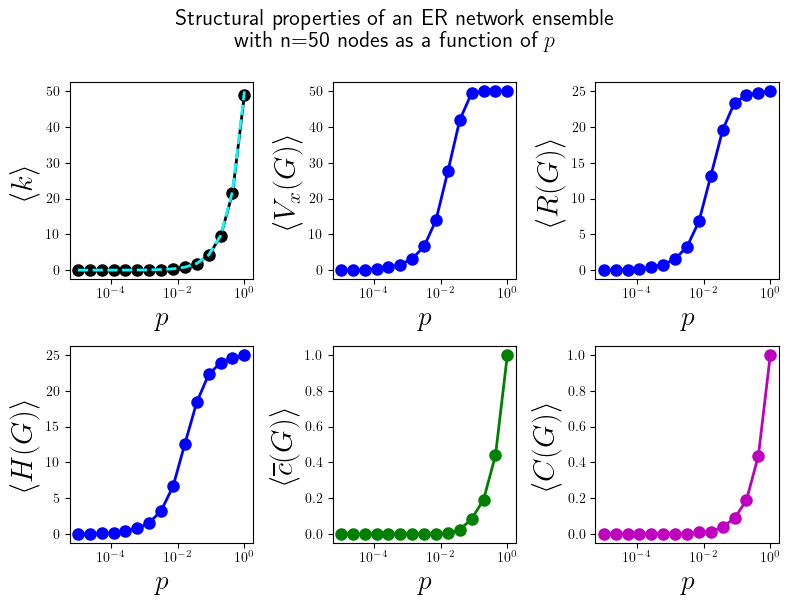

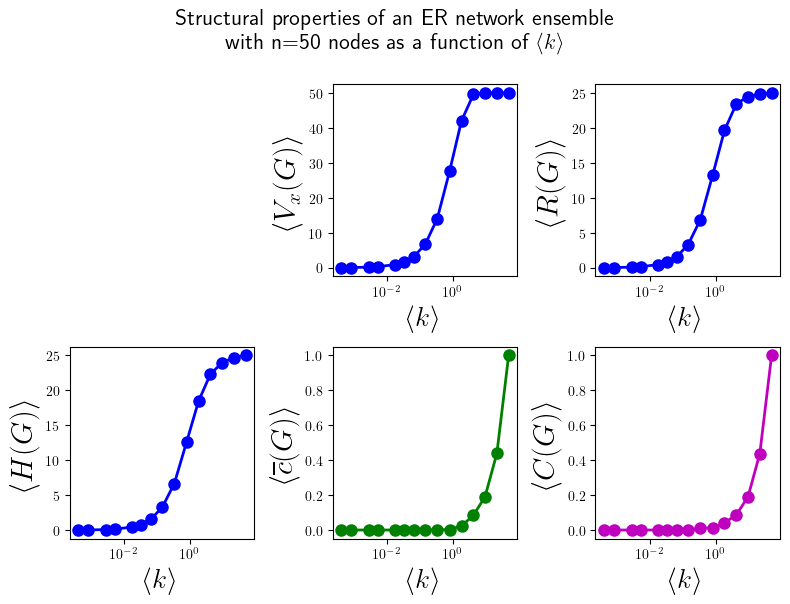

In [321]:
#Set a LaTex environment for improved visualization
plt.rcParams['text.usetex'] = True

# Create a figure with two subplots
fig, ( (ax1, ax2, ax3), (ax4, ax5, ax6) ) = plt.subplots(2, 3, figsize=(8, 6 ))

fontsize_x = 20
fontsize_y = 22

#plt.plot(average_degree,Randic, 'ro')
ax1.plot(probabilities, ensemble_average_degree, 'ko-', linewidth=2, markersize=8 )
ax1.plot(probabilities, probabilities*num_nodes, color='cyan', linestyle='dashed' , linewidth = 2)
ax1.set_ylabel("$\\langle k\\rangle$", fontsize = fontsize_y)
ax1.set_xlabel("$p$", fontsize = fontsize_x)
ax1.set_xscale('log')

ax2.plot(probabilities, ensemble_number_of_nonisolated_vertices, 'bo-', linewidth=2, markersize=8)
ax2.set_ylabel("$\\langle V_x(G) \\rangle$", fontsize = fontsize_y)
ax2.set_xlabel("$p$", fontsize = fontsize_x)
ax2.set_xscale('log')
    
    
ax3.plot(probabilities, ensemble_Randic, 'bo-', linewidth=2, markersize=8)
ax3.set_ylabel("$\\langle R(G) \\rangle$", fontsize = fontsize_y)
ax3.set_xlabel("$p$", fontsize = fontsize_x)
ax3.set_xscale('log')
    
ax4.plot(probabilities, ensemble_Harmonic, 'bo-', linewidth=2, markersize=8)
ax4.set_ylabel("$\\langle H(G)\\rangle$", fontsize = fontsize_y)
ax4.set_xlabel("$p$", fontsize = fontsize_x)
ax4.set_xscale('log')

ax5.plot(probabilities, ensemble_average_local_clustering, 'go-', linewidth=2, markersize=8)
ax5.set_ylabel("$\\langle \overline{c}(G)\\rangle$", fontsize = fontsize_y)
ax5.set_xlabel("$p$", fontsize = fontsize_x)
ax5.set_xscale('log')

ax6.plot(probabilities, ensemble_global_clustering_coefficient, 'mo-', linewidth=2, markersize=8)
ax6.set_ylabel("$\\langle C(G)\\rangle$", fontsize = fontsize_y)
ax6.set_xlabel("$p$", fontsize = fontsize_x)
ax6.set_xscale('log')


# Add a title
fig.suptitle(f'Structural properties of an ER network ensemble \n with n={num_nodes} nodes as a function of $p$', fontsize=16, y=1)
# Adjust layout
plt.tight_layout()
plt.savefig("Struc_ER_p.pdf", format="pdf")


# Create a figure with two subplots
#

figk, ( (ax1, ax2, ax3), (ax4, ax5, ax6) ) = plt.subplots(2, 3, figsize=(8, 6 ))

fontsize_x = 20
fontsize_y = 22

#plt.plot(average_degree,Randic, 'ro')
#ax1.set_visible(False)
ax1.plot(probabilities, ensemble_average_degree, 'ko-', linewidth=2, markersize=8)
ax1.plot(probabilities, probabilities*num_nodes, 'c--' , linewidth = 2)
ax1.set_ylabel("$\\langle k\\rangle$", fontsize = fontsize_y)
ax1.set_xlabel("$p$", fontsize = fontsize_x)
ax1.set_xscale('log')
ax1.set_visible(False)

ax2.plot(ensemble_average_degree, ensemble_number_of_nonisolated_vertices, 'bo-', linewidth=2, markersize=8)
ax2.set_ylabel("$\\langle V_x(G) \\rangle$", fontsize = fontsize_y)
ax2.set_xlabel("$\\langle k\\rangle$", fontsize = fontsize_x)
ax2.set_xscale('log')
    
ax3.plot(ensemble_average_degree, ensemble_Randic, 'bo-', linewidth=2, markersize=8)
ax3.set_ylabel("$\\langle R(G)\\rangle$", fontsize = fontsize_y)
ax3.set_xlabel("$\\langle k\\rangle$", fontsize = fontsize_x)
ax3.set_xscale('log')
    
ax4.plot(ensemble_average_degree, ensemble_Harmonic, 'bo-', linewidth=2, markersize=8)
ax4.set_ylabel("$\\langle H(G)\\rangle$", fontsize = fontsize_y)
ax4.set_xlabel("$\\langle k\\rangle$", fontsize = fontsize_x)
ax4.set_xscale('log')

ax5.plot(ensemble_average_degree, ensemble_average_local_clustering, 'go-', linewidth=2, markersize=8)
ax5.set_ylabel("$\\langle \overline{c}(G)\\rangle$", fontsize = fontsize_y)
ax5.set_xlabel("$\\langle k\\rangle$", fontsize = fontsize_x)
ax5.set_xscale('log')

ax6.plot(ensemble_average_degree, ensemble_global_clustering_coefficient, 'mo-', linewidth=2, markersize=8)
ax6.set_ylabel("$\\langle C(G)\\rangle$", fontsize = fontsize_y)
ax6.set_xlabel("$\\langle k\\rangle$", fontsize = fontsize_x)
ax6.set_xscale('log')


# Add a title
figk.suptitle(f"Structural properties of an ER network ensemble \n with n={num_nodes} nodes as a function of $\\langle k \\rangle$", fontsize=16, y=1)
    


# Adjust layout
plt.tight_layout()
plt.savefig("Struc_ER_k.pdf", format="pdf")

We see that the average degree $\langle k\rangle$ coincides with the numerical data. Just as promised in the Notebook Networks_Visualization.ipynb

Values of the parameters for the RGGmodel:
<br>
Number of nodes $n$, number of values of connection radius $\ell$, and size of the ensemble.

In [267]:
# RGG model
num_points_RGG = 15
num_nodes_RGG = 50 #Number of nodes the network model.
radii = np.geomspace(1e-5, np.sqrt(2.0), num_points_RGG) #Connection radius of the RGG model.
ensemble_size_RGG = 100

In [268]:
#np.zeros((len(probabilities)))
list_average_degree_RGG = np.zeros((len(radii)))
list_Randic_RGG = np.zeros((len(radii)))
list_Harmonic_RGG = np.zeros((len(radii)))
list_number_of_nonisolated_vertices_RGG = np.zeros((len(radii)))
list_average_local_clustering_RGG = np.zeros((len(radii)))
list_global_clustering_coefficient_RGG = np.zeros((len(radii)))



for i in range(ensemble_size_RGG):
    pre_average_degree = np.zeros((len(radii)))
    pre_Randic = np.zeros((len(radii)))
    pre_Harmonic = np.zeros((len(radii)))
    pre_number_of_nonisolated_vertices = np.zeros((len(radii)))
    pre_average_local_clustering = np.zeros((len(radii)))
    pre_global_clustering_coefficient = np.zeros((len(radii)))

    for radius in radii:
        #For the initialization of graphs and their adjacency matrices and 
        # initialize the calculation of structural properties
        RGG_Struc = StructuralPropertiesRandomNetworks(num_nodes = num_nodes_RGG, model ='RGG', radius=radius)
        
        #Generation of the binary adjacency matrix
        _, binary_adj_matrix_RGG = RGG_Struc.adjacency_matrix_rgg()
        
        #Calculation of the average degree
        degrees_RGG = RGG_Struc.degrees_of_the_network(binary_adj_matrix_RGG)
        average_degree = RGG_Struc.average_degree(degrees_RGG)
        
        #Calculation of Randic and Harmonic topological indices
        Randic, Harmonic = RGG_Struc.topological_indices(binary_adj_matrix_RGG)
    
        #Calculation of the number of nonisolated vertices (nodes).
        number_of_nonisolated_vertices = RGG_Struc.number_of_nonisolated_vertices(binary_adj_matrix_RGG)
    
        #Calculation of the average local clustering coefficient and global clustering coefficient
        average_local_clustering, global_clustering_coefficient =  RGG_Struc.clustering_coeffients(binary_adj_matrix_RGG)
        
        # Append values to the lists
        idx = np.argwhere(radii == radius)
        pre_average_degree[idx[0]] = average_degree
        pre_Randic[idx[0]] = Randic
        pre_Harmonic[idx[0]] = Harmonic
        pre_number_of_nonisolated_vertices[idx[0]] = number_of_nonisolated_vertices
        pre_average_local_clustering[idx[0]] = average_local_clustering
        pre_global_clustering_coefficient[idx[0]] = global_clustering_coefficient
    
    list_average_degree_RGG += pre_average_degree
    list_Randic_RGG += pre_Randic
    list_Harmonic_RGG += pre_Harmonic
    list_number_of_nonisolated_vertices_RGG += pre_number_of_nonisolated_vertices
    list_average_local_clustering_RGG += pre_average_local_clustering
    list_global_clustering_coefficient_RGG += pre_global_clustering_coefficient
    

In [275]:
ensemble_average_degree_RGG = [x / ensemble_size_RGG for x in list_average_degree_RGG]
ensemble_Randic_RGG = [x / ensemble_size_RGG for x in list_Randic_RGG]
ensemble_Harmonic_RGG = [x / ensemble_size_RGG for x in list_Harmonic_RGG]
ensemble_number_of_nonisolated_vertices_RGG = [x / ensemble_size_RGG for x in list_number_of_nonisolated_vertices_RGG]
ensemble_average_local_clustering_RGG = [x / ensemble_size_RGG for x in list_average_local_clustering_RGG]
ensemble_global_clustering_coefficient_RGG = [x / ensemble_size_RGG for x in list_global_clustering_coefficient_RGG]

**We visualize the structural properties of RGG for this ensemble:**

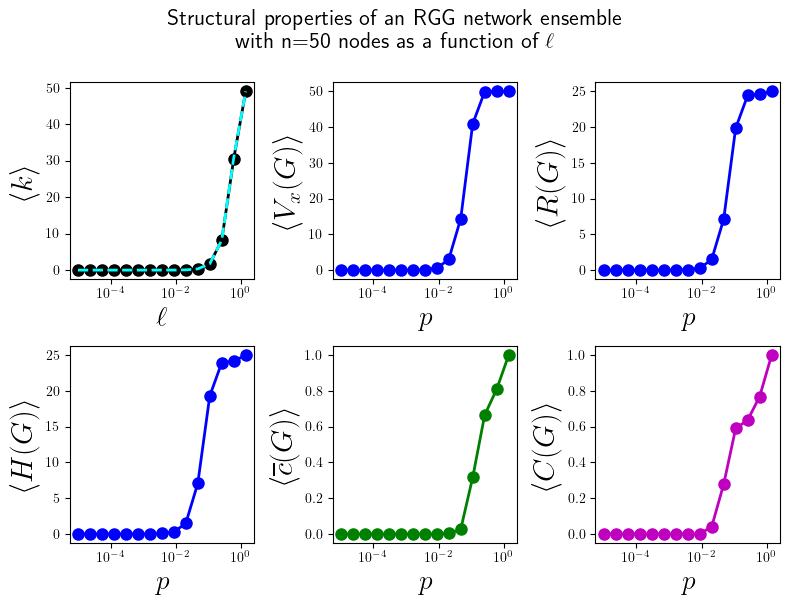

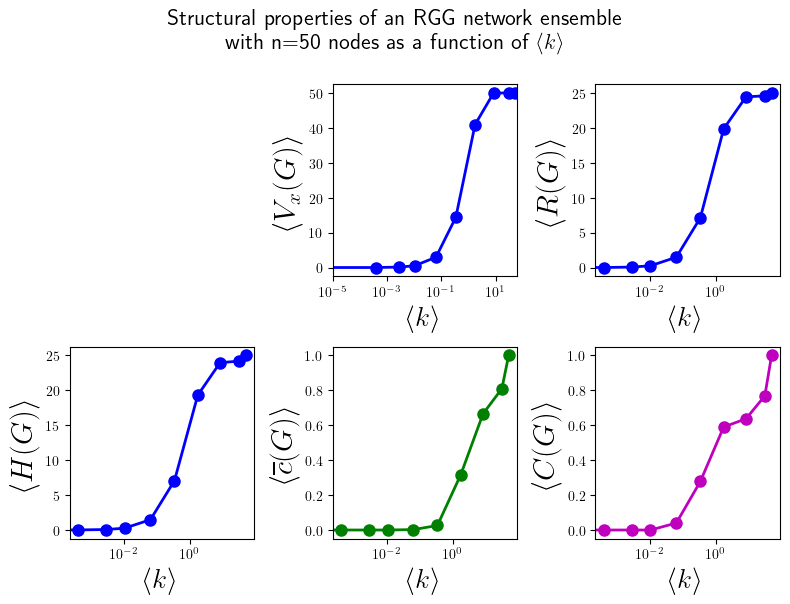

In [320]:
#Set a LaTex environment for improved visualization
plt.rcParams['text.usetex'] = True

# Create a figure with two subplots
fig, ( (ax1, ax2, ax3), (ax4, ax5, ax6) ) = plt.subplots(2, 3, figsize=(8, 6 ))

fontsize_x = 20
fontsize_y = 22

#plt.plot(average_degree,Randic, 'ro')


ax1.plot(radii, ensemble_average_degree_RGG, 'ko-', linewidth=2, markersize=8 )
formula_k = np.zeros( (len(radii)) )
formula_k = [
    (num_nodes_RGG - 1) * (np.pi * (radius**2) - (8/3) * (radius**3) + 0.5 * (radius**4))
    if radius <= 1
    else  (num_nodes_RGG - 1)*( (1/3) - (2*radius**2)*( 1- np.arcsin(1/radius) + np.arccos(1/radius) ) + \
                               (4/3)*( (2*radius**2) + 1 )*np.sqrt(radius**2 - 1) - (1/2)*radius**4 )
    # Different formula for radius > 1
    for radius in radii
]
ax1.plot(radii, formula_k, color='cyan', linestyle='dashed' , linewidth = 2)
ax1.set_ylabel("$\\langle k\\rangle$", fontsize = fontsize_y)
ax1.set_xlabel("$\ell$", fontsize = fontsize_x)
ax1.set_xscale('log')

ax2.plot(radii, ensemble_number_of_nonisolated_vertices_RGG, 'bo-', linewidth=2, markersize=8)
ax2.set_ylabel("$\\langle V_x(G) \\rangle$", fontsize = fontsize_y)
ax2.set_xlabel("$p$", fontsize = fontsize_x)
ax2.set_xscale('log')
    
    
ax3.plot(radii, ensemble_Randic_RGG, 'bo-', linewidth=2, markersize=8)
ax3.set_ylabel("$\\langle R(G) \\rangle$", fontsize = fontsize_y)
ax3.set_xlabel("$p$", fontsize = fontsize_x)
ax3.set_xscale('log')
    
ax4.plot(radii, ensemble_Harmonic_RGG, 'bo-', linewidth=2, markersize=8)
ax4.set_ylabel("$\\langle H(G)\\rangle$", fontsize = fontsize_y)
ax4.set_xlabel("$p$", fontsize = fontsize_x)
ax4.set_xscale('log')

ax5.plot(radii, ensemble_average_local_clustering_RGG, 'go-', linewidth=2, markersize=8)
ax5.set_ylabel("$\\langle \overline{c}(G)\\rangle$", fontsize = fontsize_y)
ax5.set_xlabel("$p$", fontsize = fontsize_x)
ax5.set_xscale('log')

ax6.plot(radii, ensemble_global_clustering_coefficient_RGG, 'mo-', linewidth=2, markersize=8)
ax6.set_ylabel("$\\langle C(G)\\rangle$", fontsize = fontsize_y)
ax6.set_xlabel("$p$", fontsize = fontsize_x)
ax6.set_xscale('log')


# Add a title
fig.suptitle(f'Structural properties of an RGG network ensemble \n with n={num_nodes_RGG} nodes as a function of $\ell$', fontsize=16, y=1)
# Adjust layout
plt.tight_layout()
plt.savefig("Struc_RGG_radius.pdf", format="pdf")


# Create a figure with two subplots
#

figk, ( (ax1, ax2, ax3), (ax4, ax5, ax6) ) = plt.subplots(2, 3, figsize=(8, 6 ))

fontsize_x = 20
fontsize_y = 22

#plt.plot(average_degree,Randic, 'ro')
#ax1.set_visible(False)
ax1.plot(radii, ensemble_average_degree_RGG, 'ko-', linewidth=2, markersize=8)
ax1.plot(radii, formula_k, 'c--' , linewidth = 2)
ax1.set_ylabel("$\\langle k\\rangle$", fontsize = fontsize_y)
ax1.set_xlabel("$\\ell$", fontsize = fontsize_x)
ax1.set_xscale('log')
ax1.set_visible(False)

ax2.plot(ensemble_average_degree_RGG, ensemble_number_of_nonisolated_vertices_RGG, 'bo-', linewidth=2, markersize=8)
ax2.set_ylabel("$\\langle V_x(G) \\rangle$", fontsize = fontsize_y)
ax2.set_xlabel("$\\langle k\\rangle$", fontsize = fontsize_x)
ax2.set_xscale('log')
ax2.set_xlim(left=1e-5, right=num_nodes_RGG+10)

    
ax3.plot(ensemble_average_degree_RGG, ensemble_Randic_RGG, 'bo-', linewidth=2, markersize=8)
ax3.set_ylabel("$\\langle R(G)\\rangle$", fontsize = fontsize_y)
ax3.set_xlabel("$\\langle k\\rangle$", fontsize = fontsize_x)
ax3.set_xscale('log')
    
ax4.plot(ensemble_average_degree_RGG, ensemble_Harmonic_RGG, 'bo-', linewidth=2, markersize=8)
ax4.set_ylabel("$\\langle H(G)\\rangle$", fontsize = fontsize_y)
ax4.set_xlabel("$\\langle k\\rangle$", fontsize = fontsize_x)
ax4.set_xscale('log')

ax5.plot(ensemble_average_degree_RGG, ensemble_average_local_clustering_RGG, 'go-', linewidth=2, markersize=8)
ax5.set_ylabel("$\\langle \overline{c}(G)\\rangle$", fontsize = fontsize_y)
ax5.set_xlabel("$\\langle k\\rangle$", fontsize = fontsize_x)
ax5.set_xscale('log')

ax6.plot(ensemble_average_degree_RGG, ensemble_global_clustering_coefficient_RGG, 'mo-', linewidth=2, markersize=8)
ax6.set_ylabel("$\\langle C(G)\\rangle$", fontsize = fontsize_y)
ax6.set_xlabel("$\\langle k\\rangle$", fontsize = fontsize_x)
ax6.set_xscale('log')


# Add a title
figk.suptitle(f"Structural properties of an RGG network ensemble \n with n={num_nodes_RGG} nodes as a function of $\\langle k \\rangle$", \
              fontsize=16, y=1)
    


# Adjust layout
plt.tight_layout()
plt.savefig("Struc_RGG_k.pdf", format="pdf")

Values of the parameters for the HRG model:
<br>
Number of nodes $n$, number of values of hyperbolic disk radius $\rho$, exponent of the radii distribution $\alpha$, curvature as $K=-\zeta^2$ and size of the ensemble.

In [283]:
alpha = 2.0 #Exponent of the radii coordinate distribution of the nodes in the HRG.
disk_radii = np.geomspace(1, 10, num_points) #Radius of the hyperbolic 2D disk, which also is the connection radius.
curvature_param = 4 #Parameter associated to the gaussian curvature K.
num_nodes_HRG = 50 #Number of nodes for every network model.
ensemble_size_HRG = 100

In [291]:
#np.zeros((len(probabilities)))
list_average_degree_HRG = np.zeros((len(disk_radii)))
list_Randic_HRG = np.zeros((len(disk_radii)))
list_Harmonic_HRG = np.zeros((len(disk_radii)))
list_number_of_nonisolated_vertices_HRG = np.zeros((len(disk_radii)))
list_average_local_clustering_HRG = np.zeros((len(disk_radii)))
list_global_clustering_coefficient_HRG = np.zeros((len(disk_radii)))



for i in range(ensemble_size_HRG):
    pre_average_degree = np.zeros((len(disk_radii)))
    pre_Randic = np.zeros((len(disk_radii)))
    pre_Harmonic = np.zeros((len(disk_radii)))
    pre_number_of_nonisolated_vertices = np.zeros((len(disk_radii)))
    pre_average_local_clustering = np.zeros((len(disk_radii)))
    pre_global_clustering_coefficient = np.zeros((len(disk_radii)))

    for disk_radius in disk_radii:
        #For the initialization of graphs and their adjacency matrices and 
        # initialize the calculation of structural properties
        HRG_Struc = StructuralPropertiesRandomNetworks(num_nodes = num_nodes_HRG, model ='HRG', disk_radius=disk_radius, \
                                                       curvature_param=curvature_param, alpha = alpha)

        #Generation of the binary adjacency matrix
        _, binary_adj_matrix_HRG = HRG_Struc.adjacency_matrix_hrg()

        #Calculation of the average degree
        degrees_HRG = HRG_Struc.degrees_of_the_network(binary_adj_matrix_HRG)
        average_degree = HRG_Struc.average_degree(degrees_HRG)
        
        #Calculation of Randic and Harmonic topological indices
        Randic, Harmonic = HRG_Struc.topological_indices(binary_adj_matrix_HRG)
    
        #Calculation of the number of nonisolated vertices (nodes).
        number_of_nonisolated_vertices = HRG_Struc.number_of_nonisolated_vertices(binary_adj_matrix_HRG)
    
        #Calculation of the average local clustering coefficient and global clustering coefficient
        average_local_clustering, global_clustering_coefficient =  HRG_Struc.clustering_coeffients(binary_adj_matrix_HRG)
        
        # Append values to the lists
        idx = np.argwhere(disk_radii == disk_radius)
        pre_average_degree[idx[0]] = average_degree
        pre_Randic[idx[0]] = Randic
        pre_Harmonic[idx[0]] = Harmonic
        pre_number_of_nonisolated_vertices[idx[0]] = number_of_nonisolated_vertices
        pre_average_local_clustering[idx[0]] = average_local_clustering
        pre_global_clustering_coefficient[idx[0]] = global_clustering_coefficient
        
        
    
    list_average_degree_HRG += pre_average_degree
    list_Randic_HRG += pre_Randic
    list_Harmonic_HRG += pre_Harmonic
    list_number_of_nonisolated_vertices_HRG += pre_number_of_nonisolated_vertices
    list_average_local_clustering_HRG += pre_average_local_clustering
    list_global_clustering_coefficient_HRG += pre_global_clustering_coefficient
    

In [292]:
ensemble_average_degree_HRG = [x / ensemble_size_HRG for x in list_average_degree_HRG]
ensemble_Randic_HRG = [x / ensemble_size_HRG for x in list_Randic_HRG]
ensemble_Harmonic_HRG = [x / ensemble_size_HRG for x in list_Harmonic_HRG]
ensemble_number_of_nonisolated_vertices_HRG = [x / ensemble_size_HRG for x in list_number_of_nonisolated_vertices_HRG]
ensemble_average_local_clustering_HRG = [x / ensemble_size_HRG for x in list_average_local_clustering_HRG]
ensemble_global_clustering_coefficient_HRG = [x / ensemble_size_HRG for x in list_global_clustering_coefficient_HRG]

**We visualize the structural properties of HRG for this ensemble:**

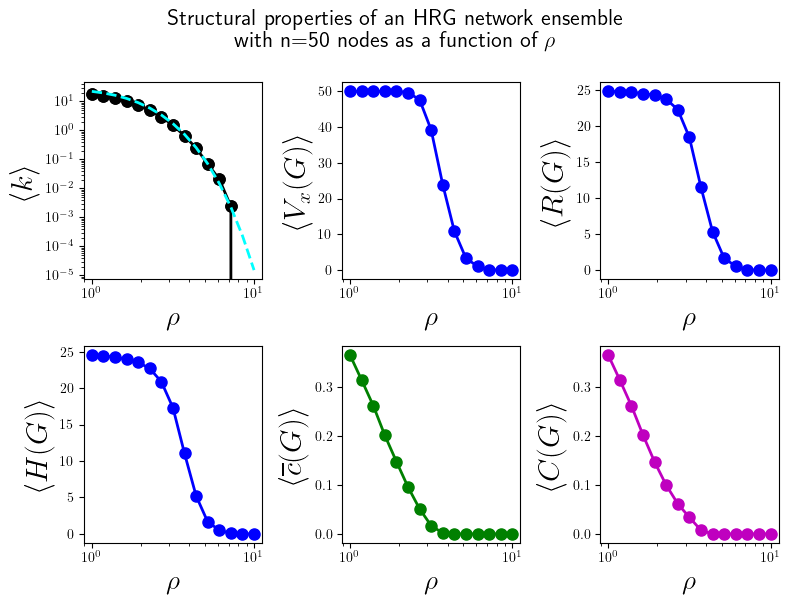

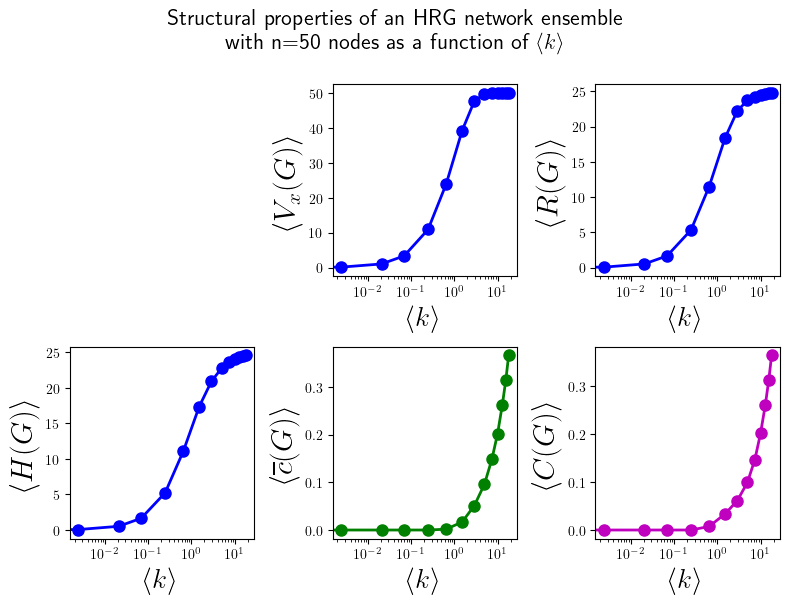

In [319]:
#Set a LaTex environment for improved visualization
plt.rcParams['text.usetex'] = True

# Create a figure with two subplots
fig_HRG, ( (ax1, ax2, ax3), (ax4, ax5, ax6) ) = plt.subplots(2, 3, figsize=(8, 6 ))

fontsize_x = 20
fontsize_y = 22

#plt.plot(average_degree,Randic, 'ro')


ax1.plot(disk_radii, ensemble_average_degree_HRG, 'ko-', linewidth=2, markersize=8 )

ax1.plot(disk_radii, ensemble_average_degree_HRG, 'ko', linewidth=2, markersize=8)
formula_k_HRG = np.zeros( (len(disk_radii)) )
#We only plot the special case of alpha/\zeta = 1/2
if alpha/curvature_param == 1/2:
    formula_k_HRG = [
        (num_nodes_HRG*curvature_param*disk_radius/2)* (1 + (curvature_param*disk_radius)/(2*np.pi) )* ( np.exp(-curvature_param*disk_radius/2) )
        for disk_radius in disk_radii]
    ax1.plot(disk_radii, formula_k_HRG, color='cyan', linestyle='dashed' , linewidth = 2)
ax1.set_ylabel("$\\langle k\\rangle$", fontsize = fontsize_y)
ax1.set_xlabel("$\\rho$", fontsize = fontsize_x)
ax1.set_xscale('log')
ax1.set_yscale('log')

ax2.plot(disk_radii, ensemble_number_of_nonisolated_vertices_HRG, 'bo-', linewidth=2, markersize=8)
ax2.set_ylabel("$\\langle V_x(G) \\rangle$", fontsize = fontsize_y)
ax2.set_xlabel("$\\rho$", fontsize = fontsize_x)
ax2.set_xscale('log')
    
    
ax3.plot(disk_radii, ensemble_Randic_HRG, 'bo-', linewidth=2, markersize=8)
ax3.set_ylabel("$\\langle R(G) \\rangle$", fontsize = fontsize_y)
ax3.set_xlabel("$\\rho$", fontsize = fontsize_x)
ax3.set_xscale('log')
    
ax4.plot(disk_radii, ensemble_Harmonic_HRG, 'bo-', linewidth=2, markersize=8)
ax4.set_ylabel("$\\langle H(G)\\rangle$", fontsize = fontsize_y)
ax4.set_xlabel("$\\rho$", fontsize = fontsize_x)
ax4.set_xscale('log')

ax5.plot(disk_radii, ensemble_average_local_clustering_HRG, 'go-', linewidth=2, markersize=8)
ax5.set_ylabel("$\\langle \overline{c}(G)\\rangle$", fontsize = fontsize_y)
ax5.set_xlabel("$\\rho$", fontsize = fontsize_x)
ax5.set_xscale('log')

ax6.plot(disk_radii, ensemble_global_clustering_coefficient_HRG, 'mo-', linewidth=2, markersize=8)
ax6.set_ylabel("$\\langle C(G)\\rangle$", fontsize = fontsize_y)
ax6.set_xlabel("$\\rho$", fontsize = fontsize_x)
ax6.set_xscale('log')


# Add a title
fig_HRG.suptitle(f'Structural properties of an HRG network ensemble \n with n={num_nodes_HRG} nodes as a function of $\\rho$', fontsize=16, y=1)
# Adjust layout
plt.tight_layout()
plt.savefig("Struc_HRG_disk_radius.pdf", format="pdf")


# Create a figure with two subplots
#

figk_HRG, ( (ax1, ax2, ax3), (ax4, ax5, ax6) ) = plt.subplots(2, 3, figsize=(8, 6 ))

fontsize_x = 20
fontsize_y = 22

#plt.plot(average_degree,Randic, 'ro')
#ax1.set_visible(False)
ax1.plot(disk_radii, ensemble_average_degree_HRG, 'ko-', linewidth=2, markersize=8)
ax1.plot(disk_radii, formula_k, 'c--' , linewidth = 2)
ax1.set_ylabel("$\\langle k\\rangle$", fontsize = fontsize_y)
ax1.set_xlabel("$\\ell$", fontsize = fontsize_x)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_visible(False)

ax2.plot(ensemble_average_degree_HRG, ensemble_number_of_nonisolated_vertices_HRG, 'bo-', linewidth=2, markersize=8)
ax2.set_ylabel("$\\langle V_x(G) \\rangle$", fontsize = fontsize_y)
ax2.set_xlabel("$\\langle k\\rangle$", fontsize = fontsize_x)
ax2.set_xscale('log')
#ax2.set_xlim(left=1e-5, right=num_nodes_RGG+10)

    
ax3.plot(ensemble_average_degree_HRG, ensemble_Randic_HRG, 'bo-', linewidth=2, markersize=8)
ax3.set_ylabel("$\\langle R(G)\\rangle$", fontsize = fontsize_y)
ax3.set_xlabel("$\\langle k\\rangle$", fontsize = fontsize_x)
ax3.set_xscale('log')
    
ax4.plot(ensemble_average_degree_HRG, ensemble_Harmonic_HRG, 'bo-', linewidth=2, markersize=8)
ax4.set_ylabel("$\\langle H(G)\\rangle$", fontsize = fontsize_y)
ax4.set_xlabel("$\\langle k\\rangle$", fontsize = fontsize_x)
ax4.set_xscale('log')

ax5.plot(ensemble_average_degree_HRG, ensemble_average_local_clustering_HRG, 'go-', linewidth=2, markersize=8)
ax5.set_ylabel("$\\langle \overline{c}(G)\\rangle$", fontsize = fontsize_y)
ax5.set_xlabel("$\\langle k\\rangle$", fontsize = fontsize_x)
ax5.set_xscale('log')

ax6.plot(ensemble_average_degree_HRG, ensemble_global_clustering_coefficient_HRG, 'mo-', linewidth=2, markersize=8)
ax6.set_ylabel("$\\langle C(G)\\rangle$", fontsize = fontsize_y)
ax6.set_xlabel("$\\langle k\\rangle$", fontsize = fontsize_x)
ax6.set_xscale('log')


# Add a title
figk_HRG.suptitle(f"Structural properties of an HRG network ensemble \n with n={num_nodes_HRG} nodes as a function of $\\langle k \\rangle$", \
              fontsize=16, y=1)
    


# Adjust layout
plt.tight_layout()

plt.savefig("Struc_HRG_K.pdf", format="pdf")